In [2]:
import pandas as pd
df = pd.read_csv('taxi.csv')

df.dtypes


VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RateCodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [3]:
df.loc[[2]]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
2,2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0.0,0.5,2.2,0.0,0.3,11.0


In [6]:
df.loc[
    df['trip_distance'] > 20     # use as a boolean index 
    ,
    ['trip_distance', 'total_amount']
]

,trip_distance,total_amount
88,23.76,94.00
809,35.51,135.13
1597,20.90,58.34
1640,28.80,72.92
1833,21.00,114.36
...,...,...
9368,20.30,60.00
9371,20.36,61.30
9394,20.05,110.46
9663,20.61,60.80


In [10]:
from pandas import Series, DataFrame
s= Series('this is a bounch of words'.split())
s


0      this
1        is
2         a
3    bounch
4        of
5     words
dtype: object

In [11]:
s.str.len()


0    4
1    2
2    1
3    6
4    2
5    5
dtype: int64

In [12]:
s.loc [ s.str.len() > s.str.len().mean() ]

0      this
3    bounch
5     words
dtype: object

In [13]:
text = input('Enter your string: ')


Enter your string: 11 roee 45 thanks 98 work 89


In [16]:
s = Series(text.split())
s

0        11
1      roee
2        45
3    thanks
4        98
5      work
6        89
dtype: object

In [33]:
s.loc[~s.str.isdigit()].str.len().mean()

4.666666666666667

In [34]:
(
    s
    .loc[s.str.len()==s.loc[s.str.isdigit()==False]
    .str.len().max()]
)

3    thanks
dtype: object

In [31]:
s.loc[s.str.isdigit()].astype(int).mean()

60.75

In [38]:
import numpy as np

s = Series([10, 20, np.nan , np.nan, 40, 30, 25, 100])
s

0     10.0
1     20.0
2      NaN
3      NaN
4     40.0
5     30.0
6     25.0
7    100.0
dtype: float64

In [39]:
s.interpolate()

0     10.000000
1     20.000000
2     26.666667
3     33.333333
4     40.000000
5     30.000000
6     25.000000
7    100.000000
dtype: float64

In [44]:
df = DataFrame(np.random.randint(0, 100, [3,3]), 
               index=list('abc'),
               columns= list ('xyz')
              )
df

,x,y,z
a,13,47,33
b,27,81,65
c,28,0,37


In [45]:
filename = '../data/winemag-150k-reviews.csv'

df = pd.read_csv(filename)
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [46]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [47]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 105.8 MB


In [48]:
for one_col in ['country', 'province', 'region_1', 'region_2', 'winery' ]:
    df[one_col]=df[one_col].astype('category')

In [49]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   Unnamed: 0   150930 non-null  int64   
 1   country      150925 non-null  category
 2   description  150930 non-null  object  
 3   designation  105195 non-null  object  
 4   points       150930 non-null  int64   
 5   price        137235 non-null  float64 
 6   province     150925 non-null  category
 7   region_1     125870 non-null  category
 8   region_2     60953 non-null   category
 9   variety      150930 non-null  object  
 10  winery       150930 non-null  category
dtypes: category(5), float64(1), int64(2), object(3)
memory usage: 68.5 MB


In [51]:
filename = 'taxi.csv'

df = pd.read_csv(filename)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0.0,0.5,0.00,0.0,0.3,17.80
1,2,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,-73.971443,40.758942,1,N,-73.978539,40.761909,1,6.5,0.0,0.5,1.00,0.0,0.3,8.30
2,2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0.0,0.5,2.20,0.0,0.3,11.00
3,2,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,-73.945892,40.773529,1,N,-73.971527,40.760330,1,13.5,0.0,0.5,2.86,0.0,0.3,17.16
4,1,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0.0,0.5,0.00,0.0,0.3,10.30


In [53]:
df.groupby('passenger_count')['total_amount'].mean()


passenger_count
0    25.570000
1    17.368569
2    18.406306
3    17.994704
4    18.881648
5    17.211269
6    17.401355
Name: total_amount, dtype: float64

In [55]:
# Calculate the tip (tip_amount) as a percentage of total_fare, and assign to tip_percentage. Did larger groups pay a larger percentage tip?

df['tip_percentage'] = df['tip_amount']/df['total_amount']
df.groupby('passenger_count')['tip_percentage'].mean()

passenger_count
0    0.183127
1    0.092880
2    0.088309
3    0.087368
4    0.077067
5    0.094349
6    0.086075
Name: tip_percentage, dtype: float64

In [58]:
df.groupby('VendorID')['tip_percentage'].mean()

VendorID
1    0.091538
2    0.091680
Name: tip_percentage, dtype: float64

In [59]:
filename = '../data/winemag-150k-reviews.csv'

df = pd.read_csv(filename)
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [63]:
df.pivot_table(index='country',
              columns='variety',
              values='points',
              aggfunc='mean')

variety,Agiorgitiko,Aglianico,Aidani,Airen,Albana,Albariño,Albarossa,Albarín,Aleatico,Alfrocheiro,...,Xynisteri,Yapincak,Zelen,Zibibbo,Zierfandler,Zierfandler-Rotgipfler,Zinfandel,Zlahtina,Zweigelt,Žilavka
country,,,,,,,,,,,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,88.200000,NaN,NaN,NaN
Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,91.363636,90.333333,NaN,NaN,87.320755,NaN
Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,85.000000,NaN,NaN,NaN


<Axes: xlabel='country'>

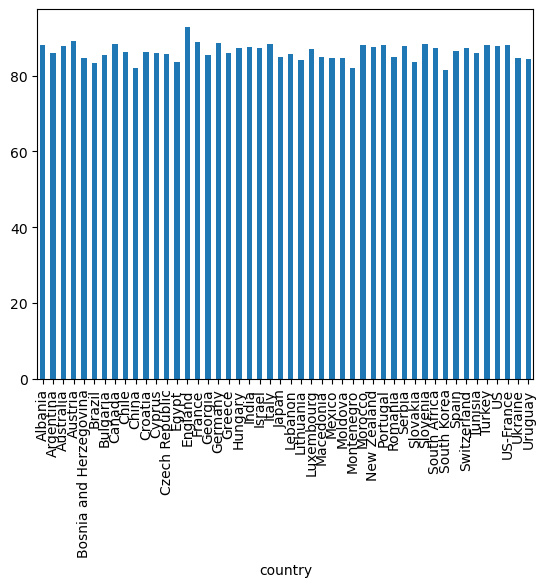

In [66]:
df.groupby('country')['points'].mean().plot.bar()